# Technical Analysis: Thorough Comparison between Conjugate Gradient and Polak Ribiere Methods 

#### Authors:
* Ridha Alkhabaz (ridhama2)
* Ali Albazroun (aia)
* Priyam  Mazumdar (priyamm2)

#### Github repository:
You can find our code and more files [here](https://github.com/ridhaalkhabaz/optiz_vision_learning).
#### Outline:

**1- Introduction**

**2- Experiments**

**3- Results**

**4- Conclusions**

#### Introduction:

In this assignment, we are trying to determine whether **Conjugate Gradient** is better than **Polak Ribiere** methods. Our chosen objective are all well-behaved, continous, and mostly differentiable. Moreover, they all share the same minimum, which is $x = [0]^d$, where d is the dimension. Here is a list of our chosen objective functions:

* [Rastrigin Functions](https://en.wikipedia.org/wiki/Rastrigin_function): It is non-convex function with the following form:
$$ f(x) = An +  \sum_{i=1}^{n} (x_{i}^{2} - A cos(2 \pi x_i)), \quad where \quad A \in \mathbb{R}, n \in \mathbb{N}, and \quad x \in \mathbb{R}^{n}$$
* [Bent Cigar Function](https://al-roomi.org/benchmarks/unconstrained/n-dimensions/164-bent-cigar-function): It is a convex function with the following function:
$$ f(x) = x_{1}^{2} + 10^{6}\sum_{i=1}^{n} x_{i}^{2}, \quad where \quad n \in \mathbb{N}, and \quad x \in \mathbb{R}^{n}$$
* [Rotated Hyper-Ellipsoid Function](https://www.sfu.ca/~ssurjano/rothyp.html): It is a convex function with the following form:
$$ f(x) = \sum_{i=1}^{n} \sum_{j=1}^{i} x_{j}^{2}, \quad where \quad n \in \mathbb{N}, and \quad x \in \mathbb{R}^{n}$$
* [Rosenbrock Function](https://www.sfu.ca/~ssurjano/rosen.html): It is a convex function with the following form:
$$ f(x) = \sum_{i=1}^{n} [100(x_{i+1}-x_{i}^{2})^2 + (x_i - 1)^2]\quad where \quad n \in \mathbb{N}, and \quad x \in \mathbb{R}^{n}$$
* [Matyas Functions](https://www.sfu.ca/~ssurjano/matya.html): It is a convex function with the following form:
$$ f(x) = 0.26\sum_{i=1}^{n}x_{i}^{2} - 0.48 \prod_{i=1}^{n}x_i\quad where \quad n \in \mathbb{N}, and \quad x \in \mathbb{R}^{n}$$


Since most of the team members work in either non-continoues space or discrete, we opted to use famous objective functions to evaluate optimization techniques. Although, for runtime issues, we opted to test the *Rotated Hyper-Ellipsoid* function only up to 100 dimesions. 

#### Experiments:

Please note that our experimets take more than 30 hours to run. Thus, we created a results dictionary and saved it in a pickle format to be read at any time. Please see section `results` for more information.  

In [1]:
# imports:
from scipy import optimize
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import sys, os

In [2]:
# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

def Rastrigin(x):
    z = 0 
    for i in x:
        z += i**2 - 0.5*np.cos(2*np.pi*i) + 0.5
    return z

def ellipse(x):
    dim = len(x)
    z = 0
    for i in range(dim):
        for j in range(i):
            z += (x[j]**2)
    return z
            
def cigar(x):
    z = x[0]**2
    for i in x[1:]:
        z += (10**6) * i**2
    return z

def matyas(x):
    return 0.26 * np.sum(x**2) - 0.48*np.prod(x) + 1

def rosenbrock(x):
    sum = 0
    for i in range(len(x) // 2):
        sum += 100*(x[2*i-1]**2 - x[2*i])**2 + (x[2*i-1] - 1)**2
    return sum
    

def opts_test(function, samples=50, dim=100):
    pcg_x_outs, best_pcgs, num_pcg_iterations = [], [], []
    cg_x_outs, best_cgs, num_cg_iterations = [], [], []
    
    for i in tqdm(range(samples)):
        blockPrint()
        init = np.random.randn((dim))
    
        pcg = optimize.fmin_cg(function, x0=init, full_output=True, retall=True)
        pcg_x_out, best_pcg, _, _, _, pcg_iterations = pcg
        pcg_iterations = len(pcg_iterations) - 1

        init = np.random.randn((dim))
        cg = optimize.minimize(function, x0=init, method="CG")
        cg_x_out, best_cg, cg_iterations = cg["x"], cg["fun"], cg["nit"]
    
        pcg_x_outs.append(pcg_x_out)
        best_pcgs.append(best_pcg)
        num_pcg_iterations.append(pcg_iterations)
    
        cg_x_outs.append(cg_x_out)
        best_cgs.append(best_cg)
        num_cg_iterations.append(cg_iterations)

    return pcg_x_outs, best_pcgs, num_pcg_iterations, cg_x_outs, best_cgs, num_cg_iterations


In [11]:
rpcg_x_outs, rbest_pcgs, rnum_pcg_iterations, rcg_x_outs, rbest_cgs, rnum_cg_iterations = opts_test(Rastrigin, samples=100)
epcg_x_outs, ebest_pcgs, enum_pcg_iterations, ecg_x_outs, ebest_cgs, enum_cg_iterations = opts_test(ellipse, samples=100)
cpcg_x_outs, cbest_pcgs, cnum_pcg_iterations, ccg_x_outs, cbest_cgs, cnum_cg_iterations = opts_test(cigar, samples=100)
mpcg_x_outs, mbest_pcgs, mnum_pcg_iterations, mcg_x_outs, mbest_cgs, mnum_cg_iterations = opts_test(matyas, samples=100)
ropcg_x_outs, robest_pcgs, ronum_pcg_iterations, rocg_x_outs, robest_cgs, ronum_cg_iterations = opts_test(rosenbrock, samples=100)

results = {"rastrigin": [rpcg_x_outs, rbest_pcgs, rnum_pcg_iterations, rcg_x_outs, rbest_cgs, rnum_cg_iterations], 
           "ellipse": [epcg_x_outs, ebest_pcgs, enum_pcg_iterations, ecg_x_outs, ebest_cgs, enum_cg_iterations],
           "cigar": [cpcg_x_outs, cbest_pcgs, cnum_pcg_iterations, ccg_x_outs, cbest_cgs, cnum_cg_iterations], 
           "matyas": [mpcg_x_outs, mbest_pcgs, mnum_pcg_iterations, mcg_x_outs, mbest_cgs, mnum_cg_iterations], 
           "rosenbrock": [ropcg_x_outs, robest_pcgs, ronum_pcg_iterations, rocg_x_outs, robest_cgs, ronum_cg_iterations]}

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
with open('results_sam100_dim100.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [13]:
rpcg_x_outs, rbest_pcgs, rnum_pcg_iterations, rcg_x_outs, rbest_cgs, rnum_cg_iterations = opts_test(Rastrigin, samples=100, dim=1000)
# epcg_x_outs, ebest_pcgs, enum_pcg_iterations, ecg_x_outs, ebest_cgs, enum_cg_iterations = opts_test(ellipse, samples=50, dim=1000)
cpcg_x_outs, cbest_pcgs, cnum_pcg_iterations, ccg_x_outs, cbest_cgs, cnum_cg_iterations = opts_test(cigar, samples=100, dim=1000)
mpcg_x_outs, mbest_pcgs, mnum_pcg_iterations, mcg_x_outs, mbest_cgs, mnum_cg_iterations = opts_test(matyas, samples=100, dim=1000)
ropcg_x_outs, robest_pcgs, ronum_pcg_iterations, rocg_x_outs, robest_cgs, ronum_cg_iterations = opts_test(rosenbrock, samples=100,  dim=1000)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [14]:
results = {"rastrigin": [rpcg_x_outs, rbest_pcgs, rnum_pcg_iterations, rcg_x_outs, rbest_cgs, rnum_cg_iterations], 
#            "ellipse": [epcg_x_outs, ebest_pcgs, enum_pcg_iterations, ecg_x_outs, ebest_cgs, enum_cg_iterations],
           "cigar": [cpcg_x_outs, cbest_pcgs, cnum_pcg_iterations, ccg_x_outs, cbest_cgs, cnum_cg_iterations], 
           "matyas": [mpcg_x_outs, mbest_pcgs, mnum_pcg_iterations, mcg_x_outs, mbest_cgs, mnum_cg_iterations], 
           "rosenbrock": [ropcg_x_outs, robest_pcgs, ronum_pcg_iterations, rocg_x_outs, robest_cgs, ronum_cg_iterations]}

In [15]:
with open('results_sam100_dim1000_noellipse.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### Results:

In [19]:
with open('./results_sam50_dim100.pickle', 'rb') as f:
    exp_50sam_100dim = pickle.load(f)
with open('./results_sam50_dim1000_noellipse.pickle', 'rb') as f:
    exp_50sam_1000dim = pickle.load(f)
with open('./results_sam100_dim100.pickle', 'rb') as f:
    exp_100sam_100dim = pickle.load(f)
with open('./results_sam100_dim1000_noellipse.pickle', 'rb') as f:
    exp_100sam_1000dim = pickle.load(f)

In [61]:
def plot_results(func, dims, samps, pcg_err, pcg_iterations, cg_err, cg_iterations):
    pcg = pd.DataFrame.from_dict({"err": pcg_err, 
                                  "iterations": pcg_iterations})
    pcg["type"] = "Polak"

    cg = pd.DataFrame.from_dict({"err": cg_err, 
                                  "iterations": cg_iterations})
    
    cg["type"] = "Conjugate Gradient"

    results = pd.concat([pcg, cg], axis=0, ignore_index=True)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    title_exp = "Experimenting with " + func + " function in " + str(dims)+ " dimesions given " + str(samps) + " different initializations"
    fig.suptitle(title_exp)
    sns.histplot(ax=axes[0], data=results, x='err', hue='type', alpha=0.5)
    axes[0].set_title('Error Frequency')
#     plt.show()
    sns.histplot(ax=axes[1], data=results, x='iterations', hue='type', alpha=0.5)
    axes[1].set_title('Itertaionts Frequency')
    plt.show()

# plot_results(mbest_pcgs, mnum_pcg_iterations, mbest_cgs, mnum_cg_iterations)


###### Results: Rastrigin Functions:
We do not notice any significant performance difference between **Conjugate Gradient** and **Polak Polak Ribiere**.

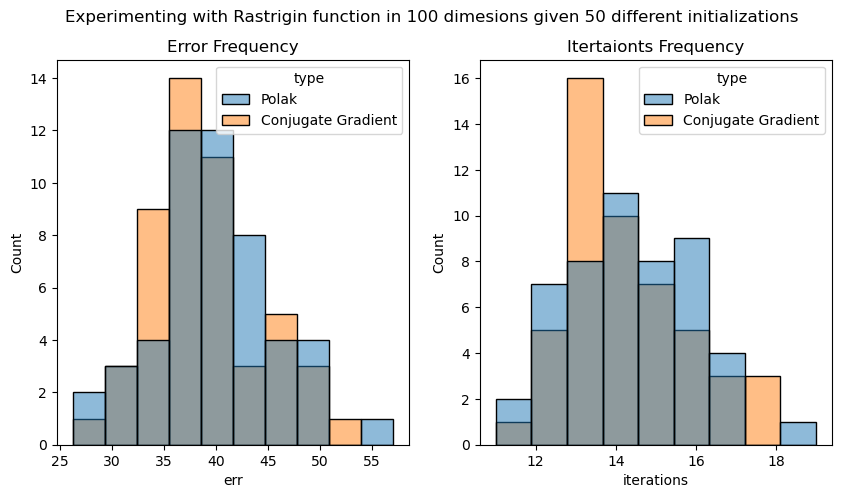

In [62]:
plot_results('Rastrigin',100, 50,  exp_50sam_100dim['rastrigin'][1], exp_50sam_100dim['rastrigin'][2], exp_50sam_100dim['rastrigin'][4], exp_50sam_100dim['rastrigin'][5])

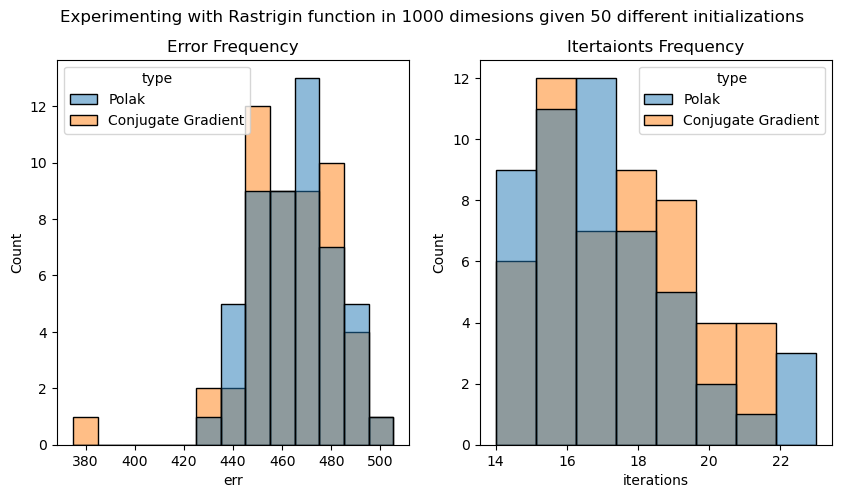

In [77]:
plot_results('Rastrigin',1000, 50,  exp_50sam_1000dim['rastrigin'][1], exp_50sam_1000dim['rastrigin'][2], exp_50sam_1000dim['rastrigin'][4], exp_50sam_1000dim['rastrigin'][5])

###### Results: Rotated Hyper-Ellipsoid Function:
We do not notice any significant performance difference between **Conjugate Gradient** and **Polak Polak Ribiere**.

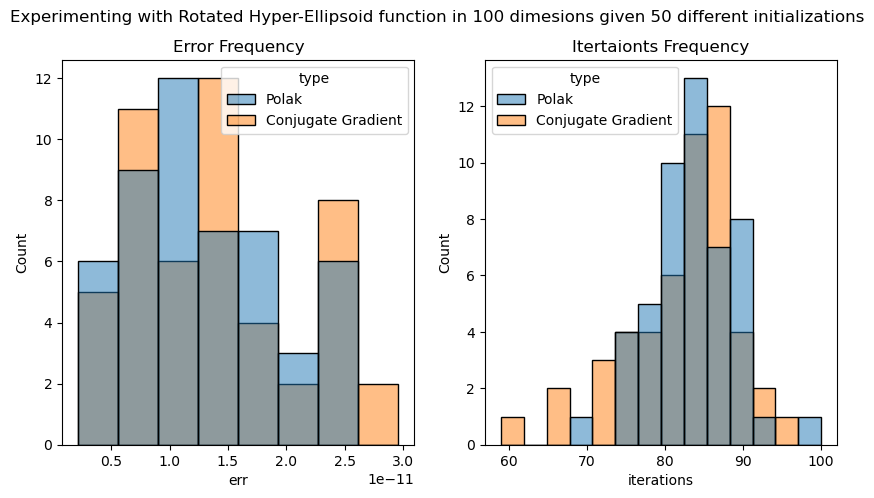

In [63]:
plot_results('Rotated Hyper-Ellipsoid',100, 50, exp_50sam_100dim['ellipse'][1], exp_50sam_100dim['ellipse'][2], exp_50sam_100dim['ellipse'][4], exp_50sam_100dim['ellipse'][5])

###### Results: Rosenbrock Function:
We do not notice any significant performance difference between **Conjugate Gradient** and **Polak Polak Ribiere**.

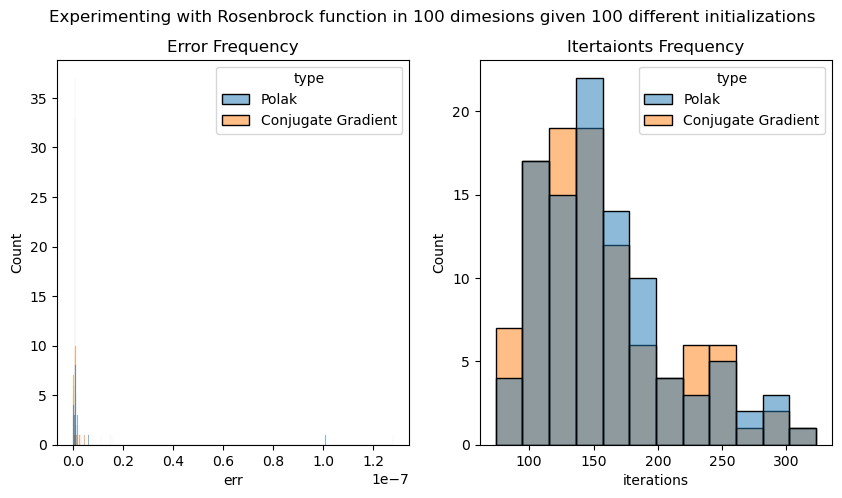

In [75]:
plot_results('Rosenbrock',100, 100, exp_100sam_100dim['rosenbrock'][1], exp_100sam_100dim['rosenbrock'][2], exp_100sam_100dim['rosenbrock'][4], exp_100sam_100dim['rosenbrock'][5])

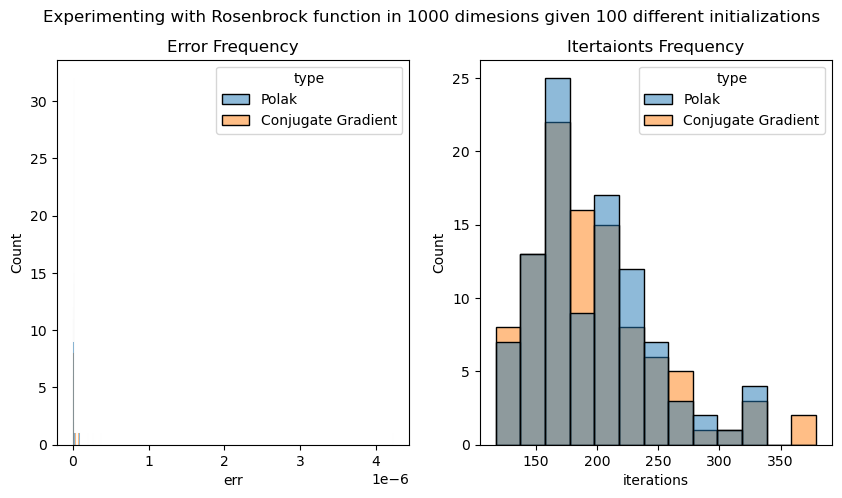

In [78]:
plot_results('Rosenbrock',1000, 100, exp_100sam_1000dim['rosenbrock'][1], exp_100sam_1000dim['rosenbrock'][2], exp_100sam_1000dim['rosenbrock'][4], exp_100sam_1000dim['rosenbrock'][5])

###### Results: Matyas Function:
We do not notice any significant performance difference between **Conjugate Gradient** and **Polak Polak Ribiere**.

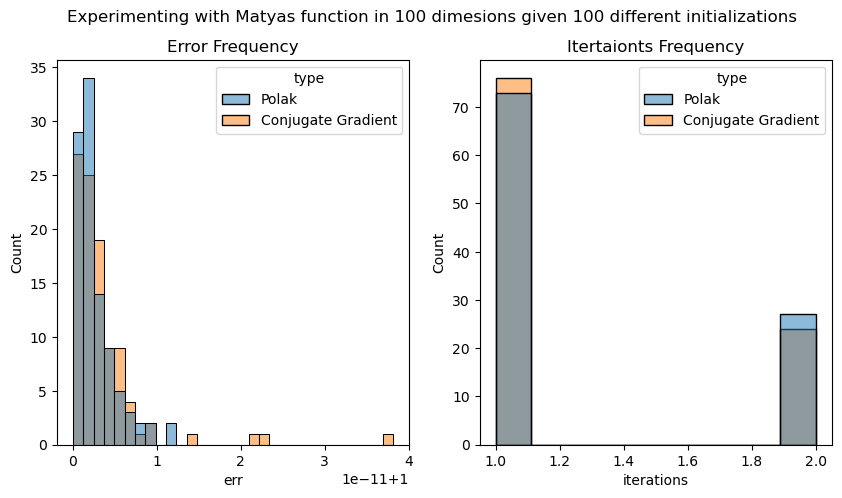

In [79]:
plot_results('Matyas',100, 100, exp_100sam_100dim['matyas'][1], exp_100sam_100dim['matyas'][2], exp_100sam_100dim['matyas'][4], exp_100sam_100dim['matyas'][5])

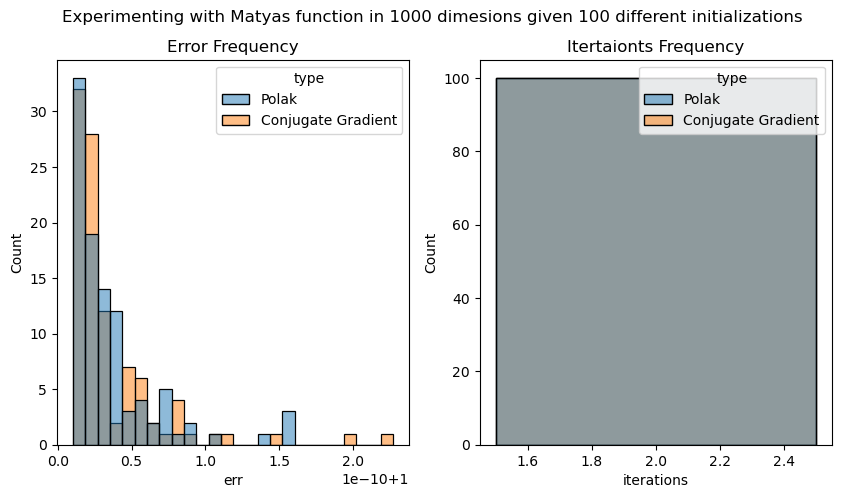

In [84]:
plot_results('Matyas',1000, 100, exp_100sam_1000dim['matyas'][1], exp_100sam_1000dim['matyas'][2], exp_100sam_1000dim['matyas'][4], exp_100sam_1000dim['matyas'][5])

###### Results: Bent Cigar Function:
We do not notice any significant performance difference between **Conjugate Gradient** and **Polak Polak Ribiere**.

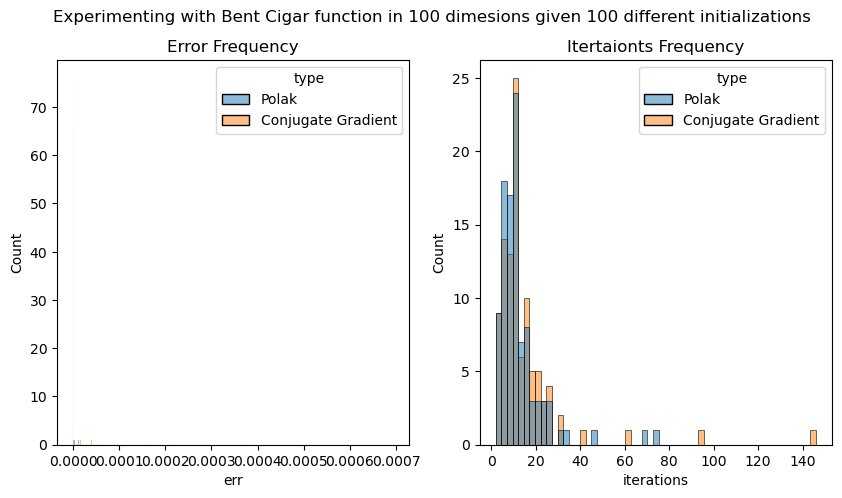

In [81]:
plot_results('Bent Cigar',100, 100, exp_100sam_100dim['cigar'][1], exp_100sam_100dim['cigar'][2], exp_100sam_100dim['cigar'][4], exp_100sam_100dim['cigar'][5])

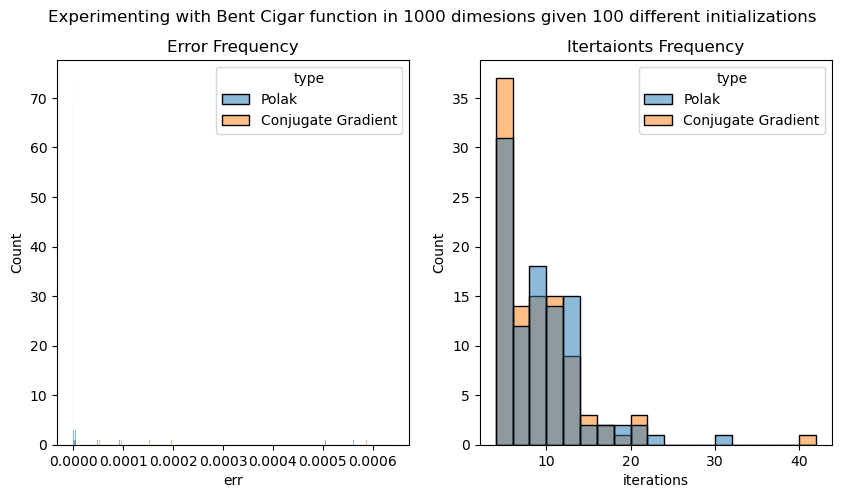

In [85]:
plot_results('Bent Cigar',1000, 100, exp_100sam_1000dim['cigar'][1], exp_100sam_1000dim['cigar'][2], exp_100sam_1000dim['cigar'][4], exp_100sam_1000dim['cigar'][5])



#### Conclusions

##### References:
* https://indrag49.github.io/Numerical-Optimization/conjugate-gradient-methods-1.html
* https://docs.scipy.org/doc/scipy/reference/optimize.html
